In [270]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
!pip install statsmodels

In [272]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [273]:
import statsmodels.api as sapi

In [274]:
df=pd.read_csv("/content/drive/MyDrive/train_1.csv")
df.fillna(0,inplace=True)

In [275]:
df[5000:6001]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
5000,Guadeloupe_fr.wikipedia.org_desktop_all-agents,726.0,699.0,714.0,529.0,548.0,692.0,775.0,768.0,696.0,...,736.0,626.0,562.0,572.0,940.0,834.0,862.0,930.0,817.0,585.0
5001,Guernica_(Picasso)_fr.wikipedia.org_desktop_al...,145.0,138.0,106.0,99.0,117.0,152.0,138.0,147.0,157.0,...,400.0,223.0,144.0,118.0,267.0,324.0,360.0,360.0,387.0,247.0
5002,Guerre_civile_syrienne_fr.wikipedia.org_deskto...,939.0,787.0,1125.0,833.0,826.0,1111.0,920.0,760.0,780.0,...,4196.0,4209.0,2710.0,3285.0,1475.0,1338.0,1556.0,1563.0,1655.0,862.0
5003,Guerre_d'Espagne_fr.wikipedia.org_desktop_all-...,218.0,193.0,200.0,187.0,170.0,233.0,206.0,228.0,176.0,...,330.0,322.0,190.0,180.0,352.0,343.0,443.0,464.0,397.0,296.0
5004,Guerre_de_Cent_Ans_fr.wikipedia.org_desktop_al...,460.0,453.0,370.0,446.0,401.0,503.0,452.0,484.0,458.0,...,474.0,425.0,378.0,347.0,621.0,560.0,543.0,570.0,506.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,Syrie_fr.wikipedia.org_desktop_all-agents,715.0,656.0,590.0,700.0,590.0,563.0,498.0,456.0,839.0,...,1177.0,1135.0,688.0,677.0,780.0,768.0,847.0,871.0,843.0,670.0
5997,T411_fr.wikipedia.org_desktop_all-agents,106.0,119.0,110.0,153.0,181.0,304.0,517.0,213.0,137.0,...,1013.0,885.0,811.0,958.0,1300.0,1148.0,1043.0,943.0,958.0,819.0
5998,Table_des_diviseurs_fr.wikipedia.org_desktop_a...,22.0,25.0,16.0,17.0,10.0,24.0,15.0,33.0,23.0,...,625.0,421.0,760.0,630.0,1022.0,383.0,743.0,781.0,435.0,452.0
5999,Taekwondo_fr.wikipedia.org_desktop_all-agents,158.0,166.0,134.0,129.0,129.0,186.0,380.0,143.0,187.0,...,145.0,140.0,113.0,121.0,145.0,161.0,185.0,132.0,131.0,119.0


In [276]:
dates = df.columns[1:]
data = pd.DataFrame(columns=['Date', 'Sum'])
for date in dates:
    sum_views = df[date].sum()
    data = data.append({'Date': date, 'Sum': sum_views}, ignore_index=True)
data

<ipython-input-276-8a25fe063b6d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Date': date, 'Sum': sum_views}, ignore_index=True)
<ipython-input-276-8a25fe063b6d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Date': date, 'Sum': sum_views}, ignore_index=True)
<ipython-input-276-8a25fe063b6d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Date': date, 'Sum': sum_views}, ignore_index=True)
<ipython-input-276-8a25fe063b6d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Date': date, 'Sum': sum_views}, ignore_index=True)
<ipython-input-276-8a25fe063

,Date,Sum
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0
...,...,...
545,2016-12-27,237248109.0
546,2016-12-28,230782936.0
547,2016-12-29,237886569.0
548,2016-12-30,207608296.0


In [277]:
data.to_csv('data.csv', index=False)

In [278]:
train_data=data[:500]

In [279]:
train_data

,Date,Sum
0,2015-07-01,148672476.0
1,2015-07-02,149593840.0
2,2015-07-03,141164198.0
3,2015-07-04,145612937.0
4,2015-07-05,151495372.0
...,...,...
495,2016-11-07,219602206.0
496,2016-11-08,223633826.0
497,2016-11-09,302272416.0
498,2016-11-10,242919627.0


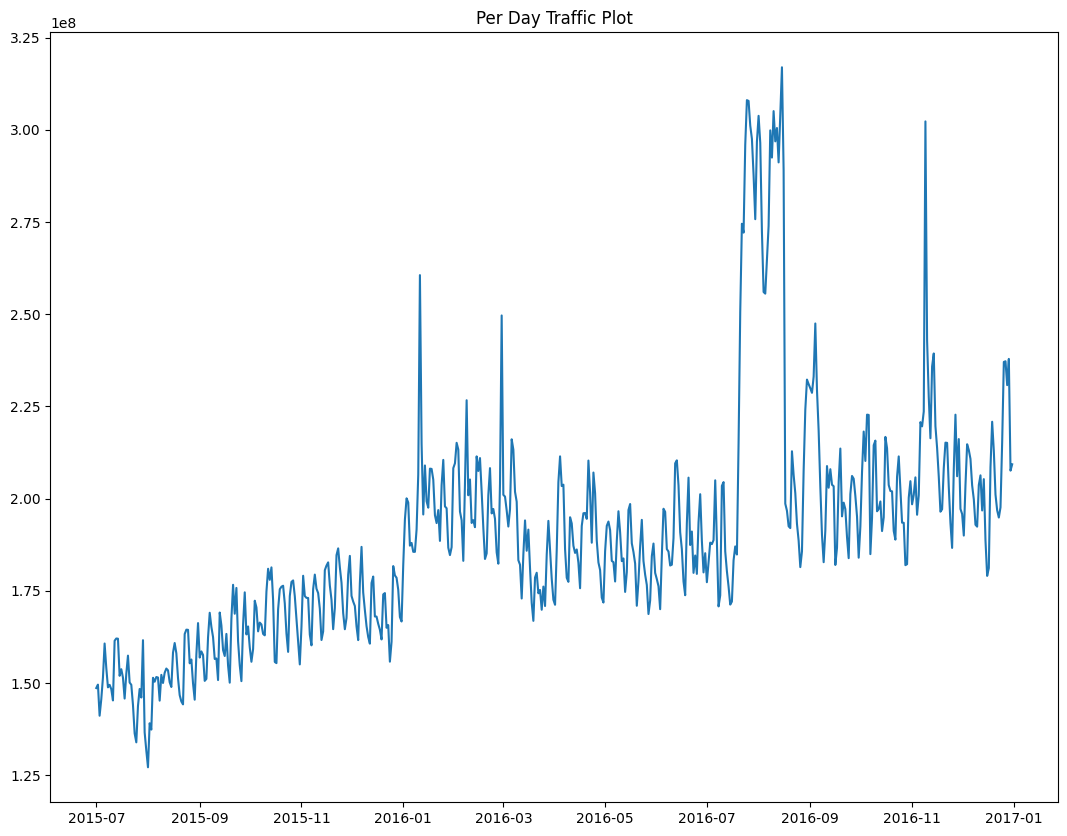

In [280]:
data["Date"] = pd.to_datetime(data["Date"],
                              format="%Y/%m/%d")
plt.figure(figsize=(13, 10))
plt.plot(data["Date"],data["Sum"])
plt.title("Per Day Traffic Plot")
plt.show()

In [281]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data["Sum"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
#given data is not stationary

ADF Statistic: -2.228348845251733
p-value: 0.19611779063112333
Critical Values: {'1%': -3.443905150512834, '5%': -2.867517732199813, '10%': -2.569953900520778}


In [282]:
train_data["Sum"]=train_data["Sum"].diff()


<ipython-input-282-045ef473ab5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Sum"]=train_data["Sum"].diff()


In [283]:
train_data=train_data[1:]
train_data

,Date,Sum
1,2015-07-02,921364.0
2,2015-07-03,-8429642.0
3,2015-07-04,4448739.0
4,2015-07-05,5882435.0
5,2015-07-06,9246862.0
...,...,...
495,2016-11-07,-1154258.0
496,2016-11-08,4031620.0
497,2016-11-09,78638590.0
498,2016-11-10,-59352789.0


In [284]:
result = adfuller(train_data["Sum"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
#first order differencing gave us stationary time series

ADF Statistic: -7.1604425030521615
p-value: 2.977751414147174e-10
Critical Values: {'1%': -3.443905150512834, '5%': -2.867517732199813, '10%': -2.569953900520778}


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sum     550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


<Figure size 640x480 with 0 Axes>

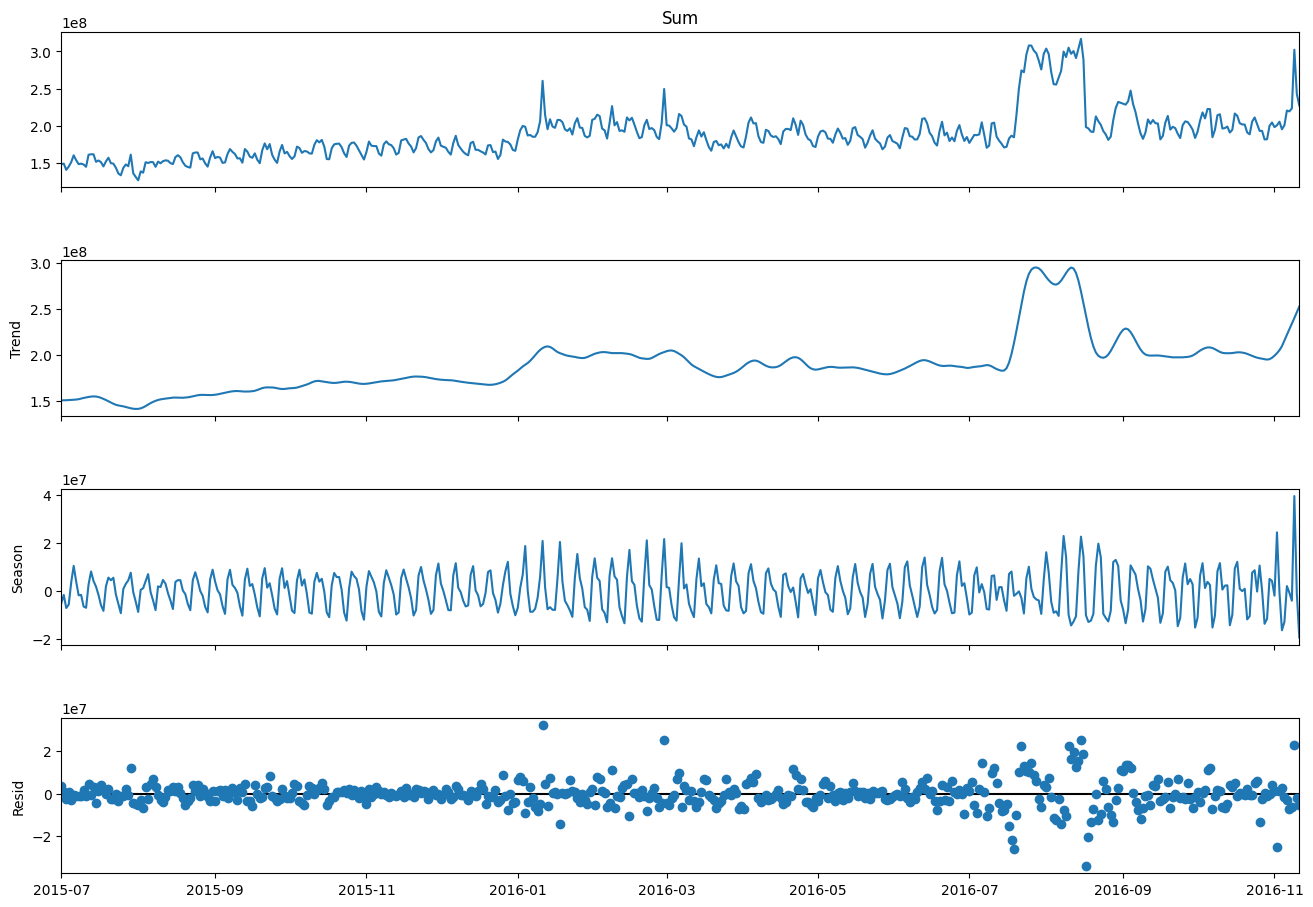

In [327]:
from statsmodels.tsa.seasonal import STL
# dta = pd.DataFrame([data[:500]])
result = STL(data[:500]["Sum"]).fit()
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Figure size 640x480 with 0 Axes>

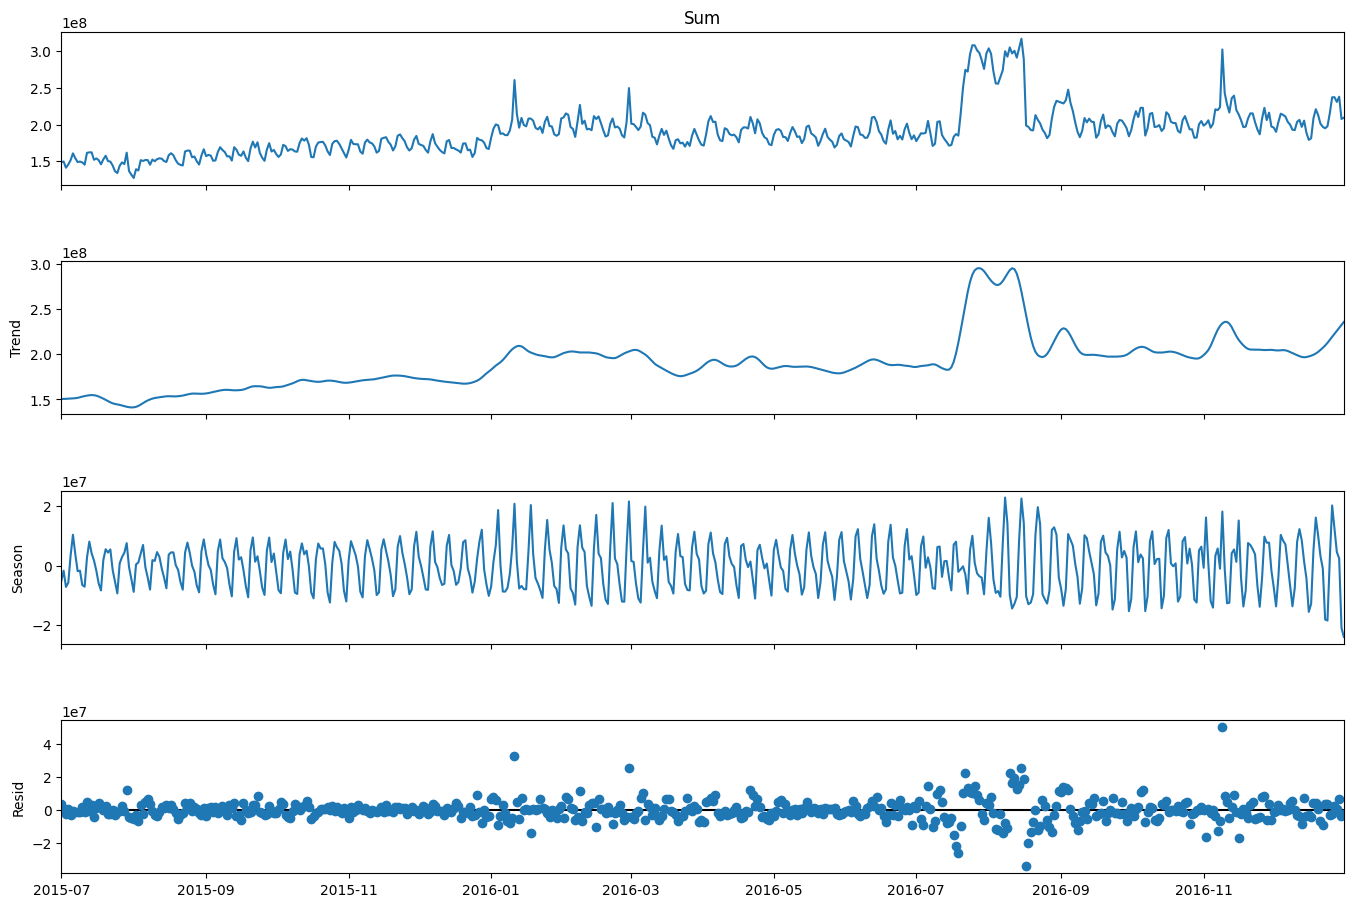

In [328]:
##Findiong the seasonality and trend of whole data
result_full = STL(data["Sum"]).fit()
fig = plt.figure()
fig = result_full.plot()
fig.set_size_inches(15, 10)

In [329]:
result_full.resid


Date
2015-07-01    3.384231e+06
2015-07-02    7.539217e+05
2015-07-03   -2.302646e+06
2015-07-04    6.041491e+05
2015-07-05   -2.924043e+06
                  ...     
2016-12-27    2.510297e+06
2016-12-28    4.403034e+05
2016-12-29    6.454804e+06
2016-12-30   -3.729852e+06
2016-12-31   -2.272993e+06
Name: resid, Length: 550, dtype: float64

In [322]:
residual=result.resid
residual

Date
2015-07-01    3.384231e+06
2015-07-02    7.539217e+05
2015-07-03   -2.302646e+06
2015-07-04    6.041491e+05
2015-07-05   -2.924043e+06
                  ...     
2016-11-07   -7.413847e+06
2016-11-08   -6.111230e+06
2016-11-09    2.268759e+07
2016-11-10   -2.238661e+06
2016-11-11   -5.557457e+06
Name: resid, Length: 500, dtype: float64

In [332]:
residual

Date
2015-07-01    3.384231e+06
2015-07-02    7.539217e+05
2015-07-03   -2.302646e+06
2015-07-04    6.041491e+05
2015-07-05   -2.924043e+06
                  ...     
2016-11-07   -7.413847e+06
2016-11-08   -6.111230e+06
2016-11-09    2.268759e+07
2016-11-10   -2.238661e+06
2016-11-11   -5.557457e+06
Name: resid, Length: 500, dtype: float64

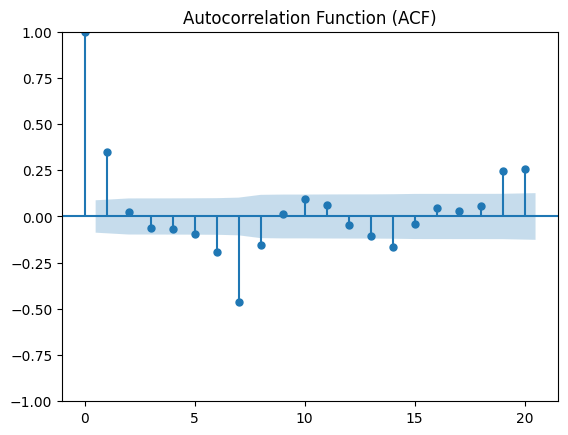

In [374]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residual, lags = 20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

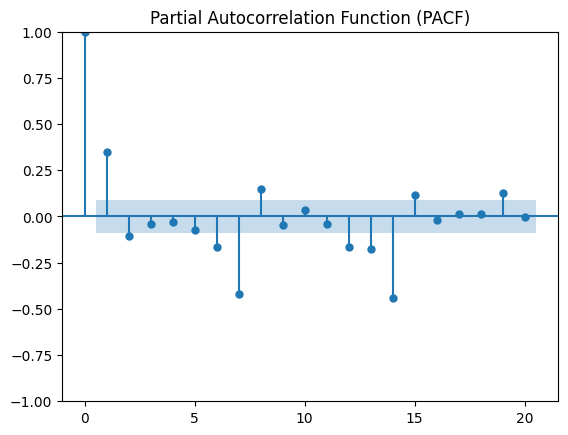

In [375]:
plot_pacf(residual, lags = 20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [376]:
!pip install pmdarima
from pmdarima import auto_arima

In [377]:
model_bic = auto_arima(residual, suppress_warnings=True, seasonal=True, information_criterion='bic')
model_bic.order

(2, 0, 1)

In [378]:
model=model_bic.fit(residual)
predictions=model.predict(n_periods = 50)
predictions

2016-11-12   -9.969901e+05
2016-11-13    1.165848e+06
2016-11-14    1.847212e+06
2016-11-15    1.742572e+06
2016-11-16    1.312990e+06
2016-11-17    8.253827e+05
2016-11-18    4.085771e+05
2016-11-19    1.052340e+05
2016-11-20   -8.830021e+04
2016-11-21   -1.953223e+05
2016-11-22   -2.431646e+05
2016-11-23   -2.555350e+05
2016-11-24   -2.498646e+05
2016-11-25   -2.373815e+05
2016-11-26   -2.243687e+05
2016-11-27   -2.136933e+05
2016-11-28   -2.061544e+05
2016-11-29   -2.014837e+05
2016-11-30   -1.989969e+05
2016-12-01   -1.979614e+05
2016-12-02   -1.977688e+05
2016-12-03   -1.979847e+05
2016-12-04   -1.983377e+05
2016-12-05   -1.986811e+05
2016-12-06   -1.989526e+05
2016-12-07   -1.991388e+05
2016-12-08   -1.992507e+05
2016-12-09   -1.993078e+05
2016-12-10   -1.993296e+05
2016-12-11   -1.993315e+05
2016-12-12   -1.993244e+05
2016-12-13   -1.993146e+05
2016-12-14   -1.993056e+05
2016-12-15   -1.992987e+05
2016-12-16   -1.992942e+05
2016-12-17   -1.992915e+05
2016-12-18   -1.992902e+05
2

In [379]:
final_predictions = np.array(predictions)+np.array(result_full.trend)[500:]+np.array(result_full.seasonal)[500:]

In [380]:
for i in range(len(predictions)):
  predictions[i]=final_predictions[i]
predictions


2016-11-12    2.201845e+08
2016-11-13    2.352435e+08
2016-11-14    2.322015e+08
2016-11-15    2.228841e+08
2016-11-16    2.323191e+08
2016-11-17    2.091587e+08
2016-11-18    1.963712e+08
2016-11-19    1.991161e+08
2016-11-20    2.132938e+08
2016-11-21    2.118093e+08
2016-11-22    2.103076e+08
2016-11-23    2.085312e+08
2016-11-24    1.979959e+08
2016-11-25    1.908267e+08
2016-11-26    2.002479e+08
2016-11-27    2.140620e+08
2016-11-28    2.121265e+08
2016-11-29    2.123200e+08
2016-11-30    2.029005e+08
2016-12-01    1.970079e+08
2016-12-02    1.902395e+08
2016-12-03    2.002307e+08
2016-12-04    2.145174e+08
2016-12-05    2.126705e+08
2016-12-06    2.111900e+08
2016-12-07    2.034284e+08
2016-12-08    1.952497e+08
2016-12-09    1.872294e+08
2016-12-10    1.922539e+08
2016-12-11    2.067257e+08
2016-12-12    2.098764e+08
2016-12-13    2.051644e+08
2016-12-14    1.977133e+08
2016-12-15    1.922914e+08
2016-12-16    1.817231e+08
2016-12-17    1.852345e+08
2016-12-18    2.043126e+08
2

<Axes: xlabel='Date'>

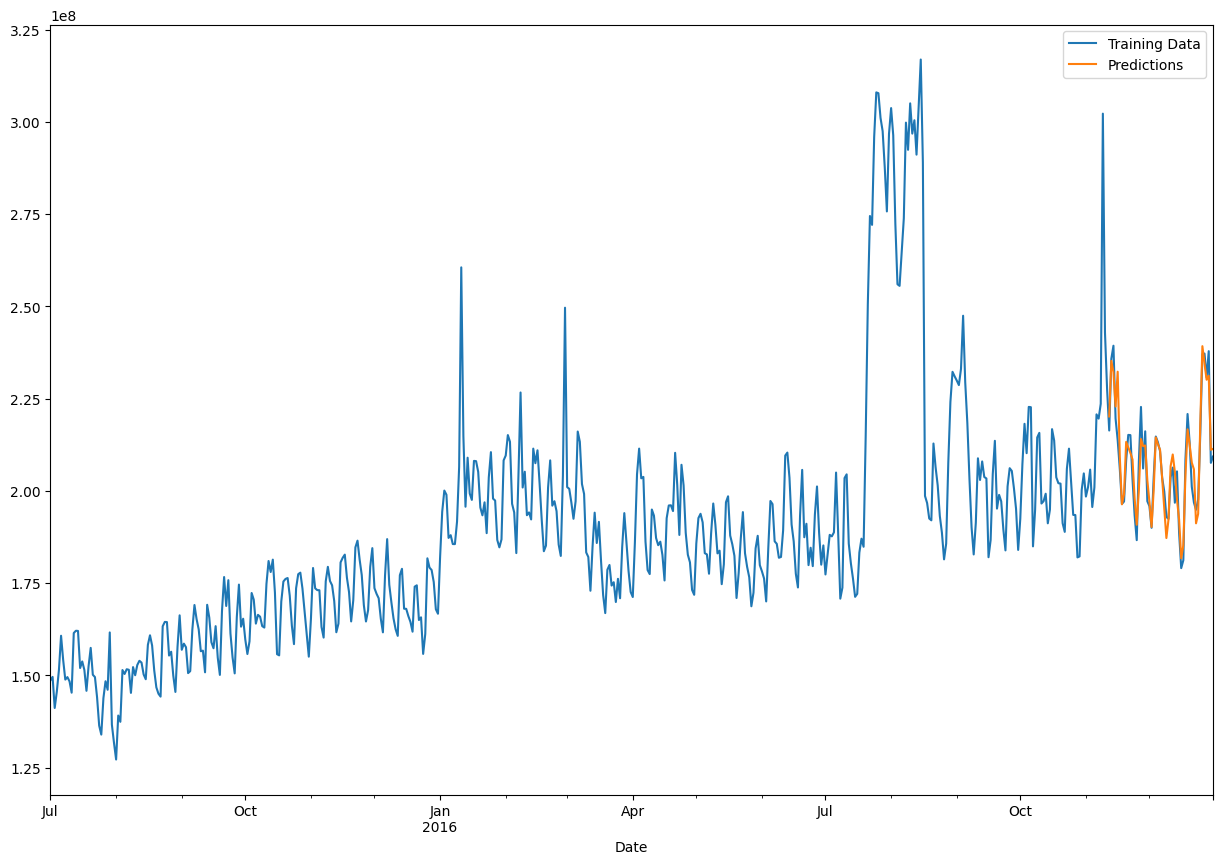

In [381]:
data["Sum"].plot(legend=True, label="Training Data",
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")